In [1]:
import pickle
import os
from ANEMO import read_edf
from ANEMO import ANEMO
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sujet = ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK']
time = ['2017-10-23_100057','2017-09-26_095637',
        '2017-10-03_134421','2017-09-27_161040',
        '2017-10-03_143803','2017-09-28_115250',
        '2017-09-20_151043','2017-10-26_121823',
        '2017-11-08_094717','2017-11-16_153313',
        '2017-11-08_150410','2017-11-17_172706']

In [3]:
file = os.path.join('parametre', 'Delete_list_trials_velocity_fct.pkl')
with open(file, 'rb') as fichier :
    Delete_list_trials = pickle.load(fichier, encoding='latin1')

file = os.path.join('parametre', 'Delete_list_Bad_trials_velocity.pkl')
with open(file, 'rb') as fichier :
    Bad_Fit = pickle.load(fichier, encoding='latin1')

In [4]:
def fig(plot='Full') :

    if plot=='Full' :
        fig, axs = plt.subplots(5, 1, figsize=(15, 5*(15*(1/2))/1.6180))
        
    for x in range(len(sujet)) :

        if plot!='Full' :
            print(sujet[x],time[x])
            fig, axs = plt.subplots(1, 5, figsize=(10*2, (10*(1/2))/1.6180))

        #-------------------------------------------------------------------------
        file = os.path.join('data', 'enregistrement_' + sujet[x] + '_' + time[x] + '.pkl')
        with open(file, 'rb') as fichier :
            param_exp = pickle.load(fichier, encoding='latin1')
        A = ANEMO(param_exp)
        N_trials = param_exp['N_trials']
        N_blocks = param_exp['N_blocks']

        resultats = os.path.join('data', 'enregistrement_' + sujet[x] + '_' + time[x] + '.asc')
        data = read_edf(resultats, 'TRIALID')

        file = os.path.join('parametre/goodness_of_fit_'+ sujet[x] +'.pkl')
        with open(file, 'rb') as fichier :
            goodness_of_fit = pickle.load(fichier, encoding='latin1')
        #-------------------------------------------------------------------------

        for block in range(N_blocks) :
            for trial in range(N_trials) :

                trial_data = trial + N_trials*block
                arg = A.arg(data[trial_data], trial=trial, block=block)
                velocity_NAN = A.velocity_NAN(**arg)[0]

                nb_nan = [x for x in velocity_NAN[arg.StimulusOf-arg.t_0:] if str(x)=='nan']

                a=1
                if trial in Delete_list_trials[sujet[x]][block] :
                    c = 'r'
                elif trial in Bad_Fit[sujet[x]][block] :
                    c = 'c'
                else :
                    a=0.2
                    c = 'k'

                k=0
                for key in goodness_of_fit.keys() :
                    if key!='residual' :
                        axs[k].set_title(key, fontsize=20)
                        axs[k].scatter(len(nb_nan), goodness_of_fit[key][block][trial], c=c, alpha=a)
                        axs[k].set_xlabel('nb_nan', fontsize=14)
                        #axs[k].set_ylabel(key, fontsize=t_label)
                        k=k+1

        if plot!='Full' :
            plt.tight_layout()
            plt.show()
    if plot=='Full':
        plt.tight_layout()
        plt.show()

In [ ]:
# TODO scatter plot : essayer holoviews ou http://datashader.org/topics/nyc_taxi.html? 
# TODO echelle log pour les chi ?

/usr/local/lib/python3.5/dist-packages/ANEMO-0.0.1-py3.5.egg/ANEMO/ANEMO.py:376: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ANEMO-0.0.1-py3.5.egg/ANEMO/ANEMO.py:376: RuntimeWarning: invalid value encountered in true_divide


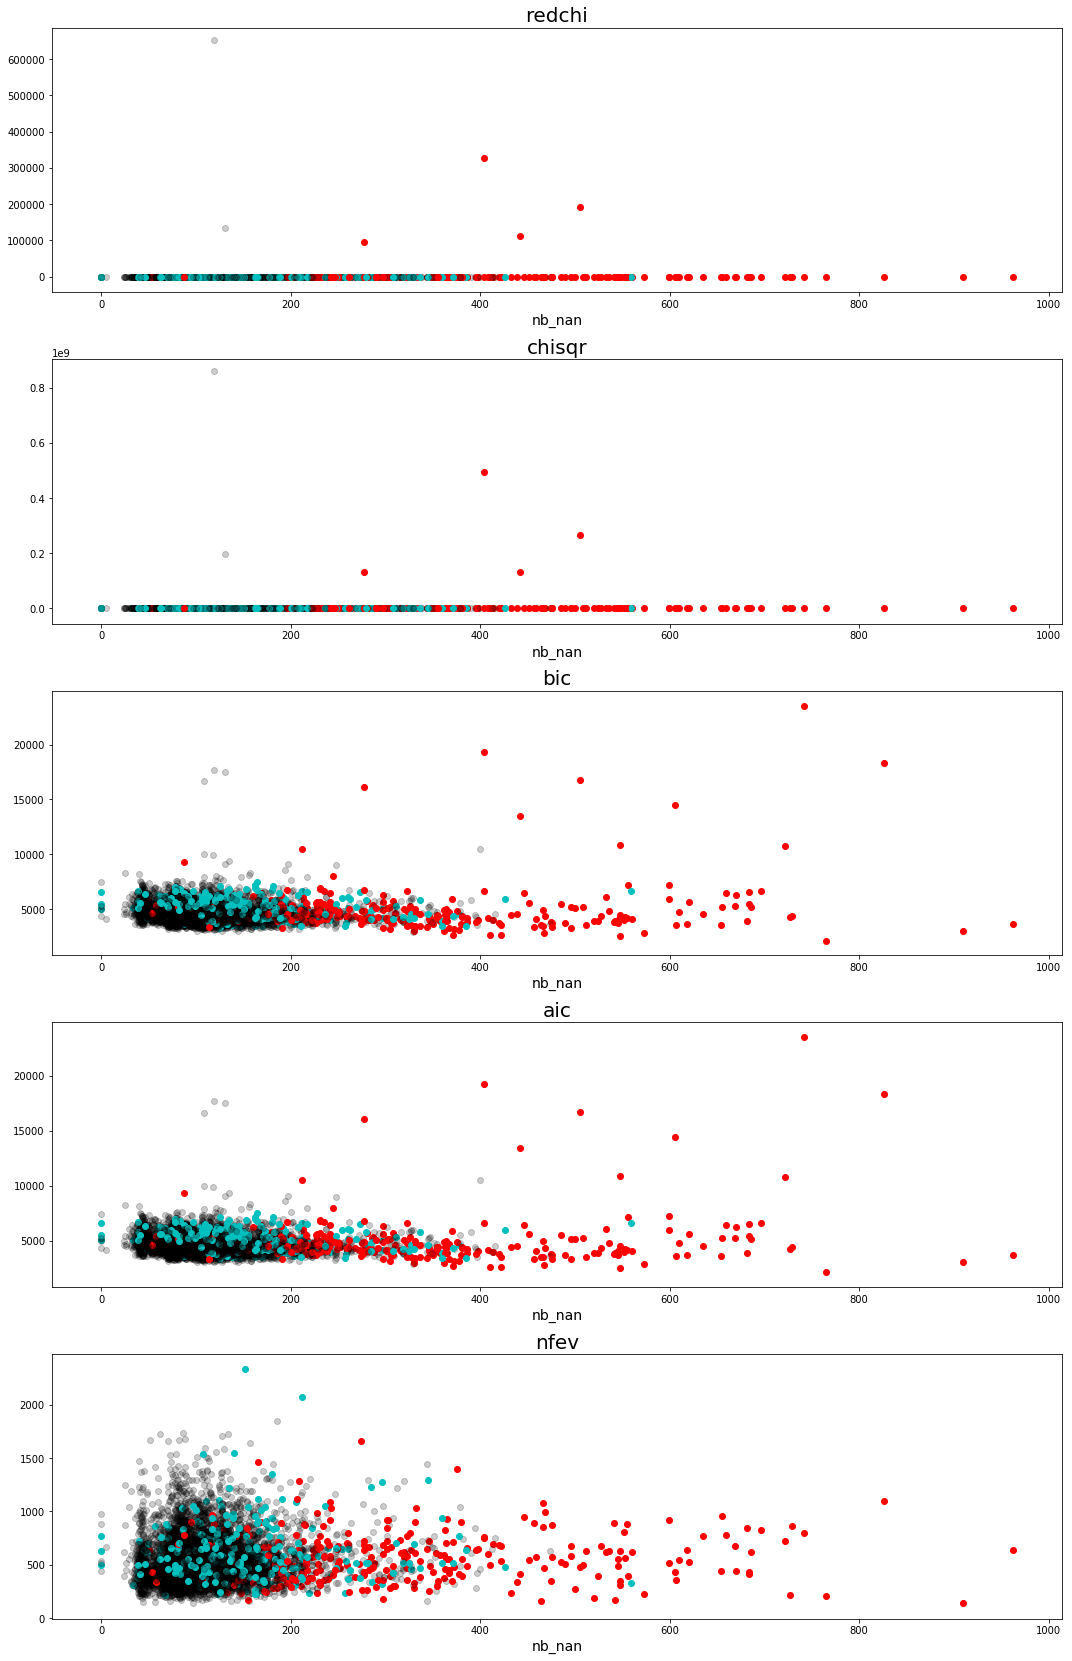

In [5]:
fig(plot='Full')

AM 2017-10-23_100057


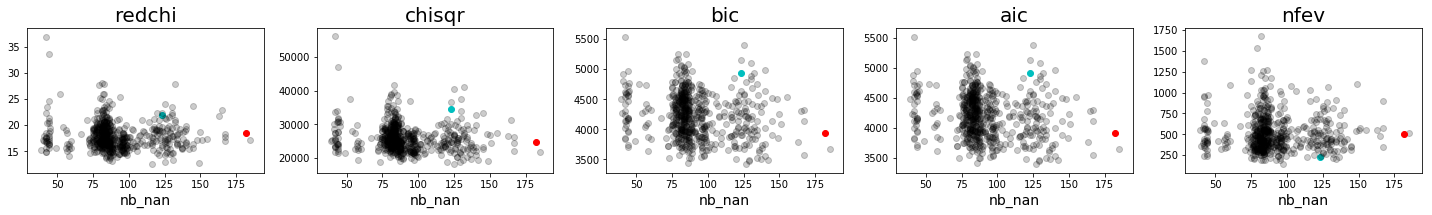

BMC 2017-09-26_095637


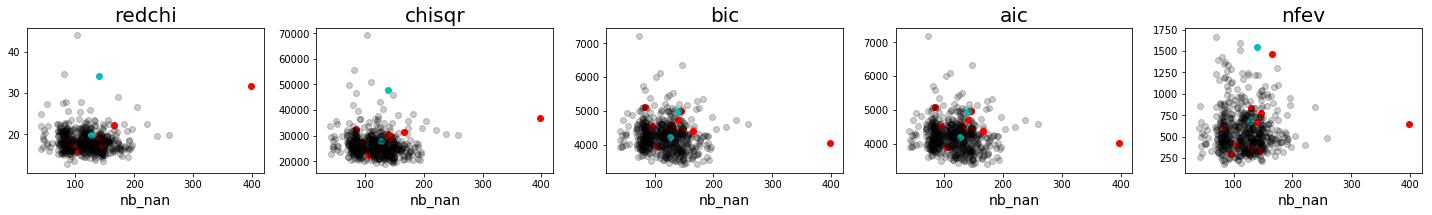

CS 2017-10-03_134421


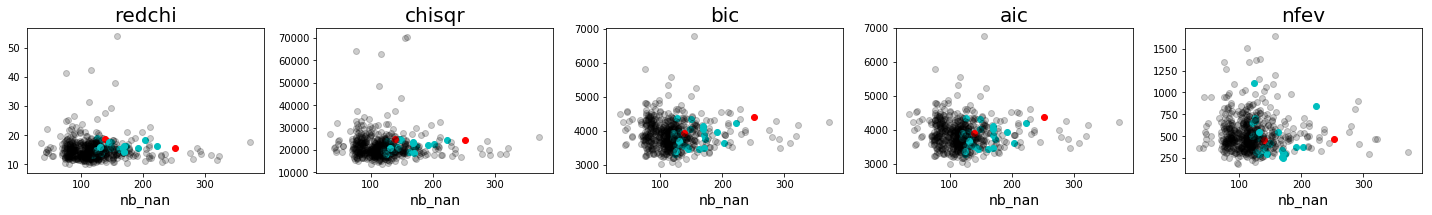

DC 2017-09-27_161040


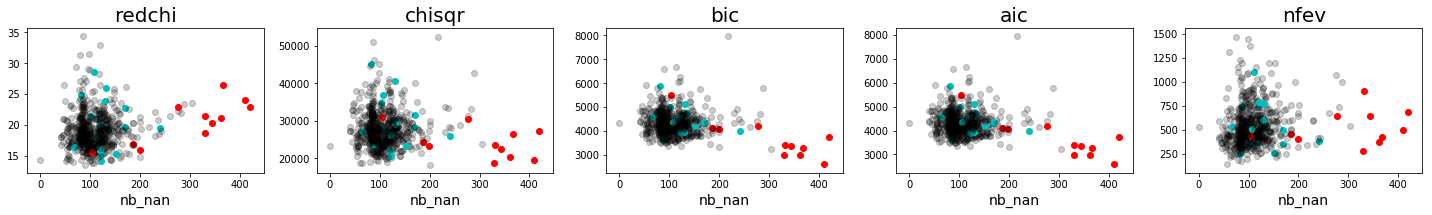

FM 2017-10-03_143803


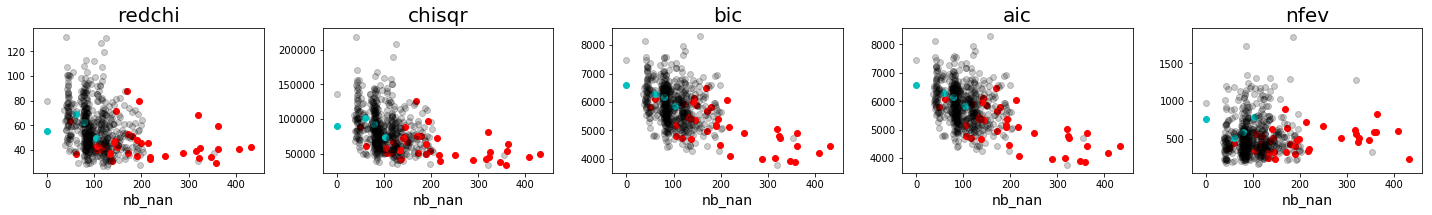

IP 2017-09-28_115250


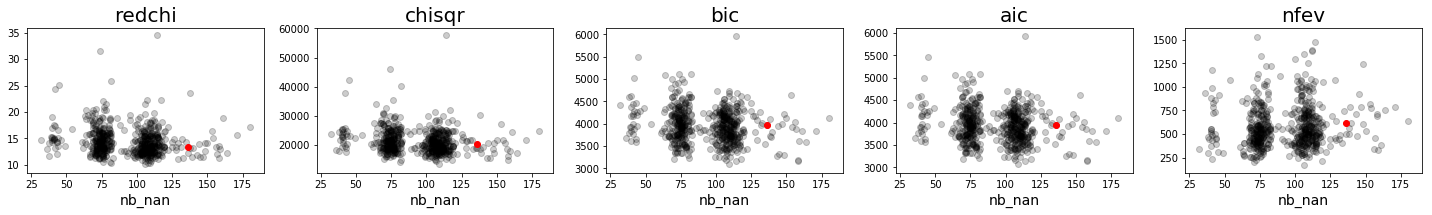

LB 2017-09-20_151043


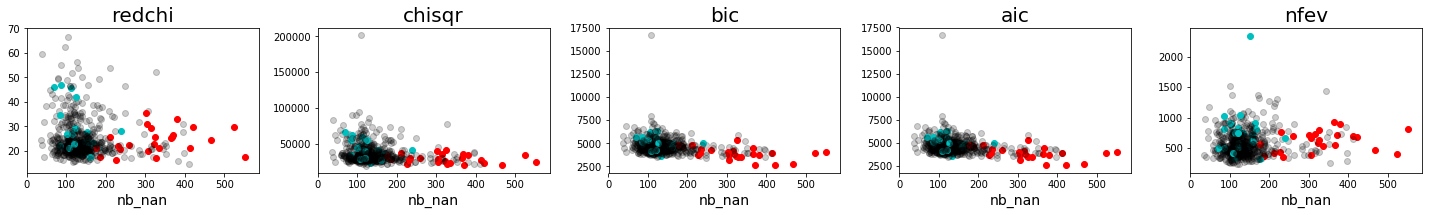

OP 2017-10-26_121823


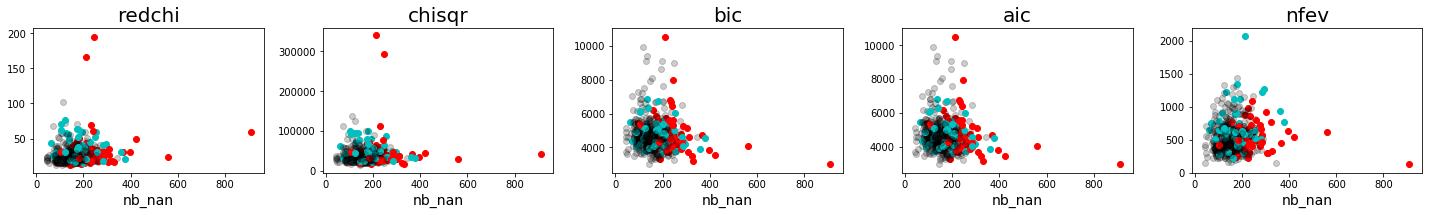

RS 2017-11-08_094717


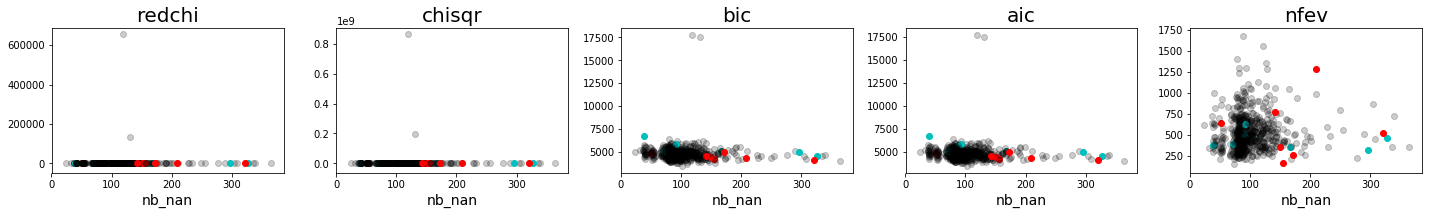

SR 2017-11-16_153313


/usr/local/lib/python3.5/dist-packages/ANEMO-0.0.1-py3.5.egg/ANEMO/ANEMO.py:376: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ANEMO-0.0.1-py3.5.egg/ANEMO/ANEMO.py:376: RuntimeWarning: invalid value encountered in true_divide


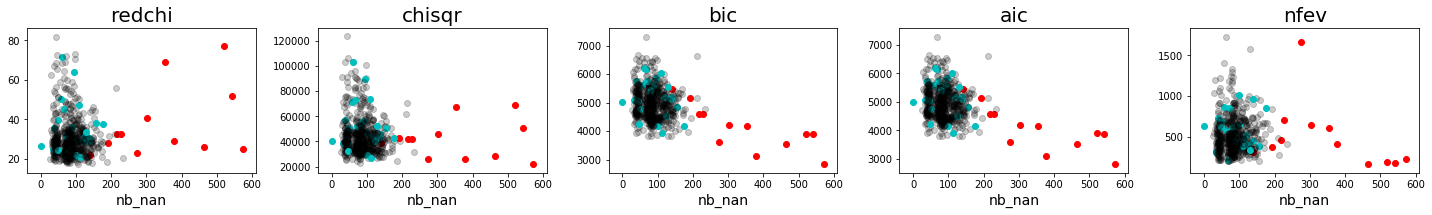

TN 2017-11-08_150410


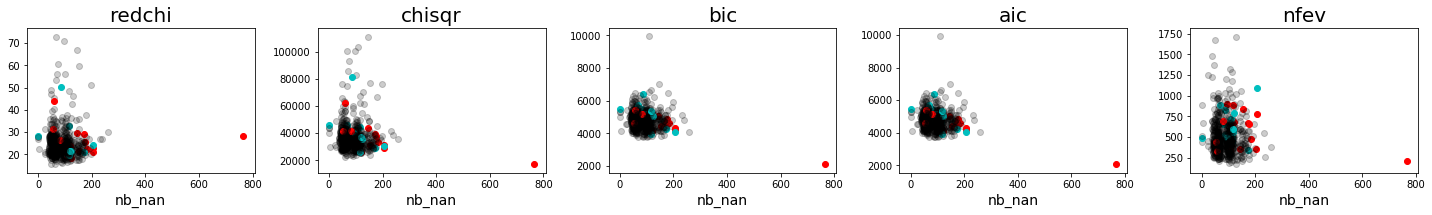

YK 2017-11-17_172706


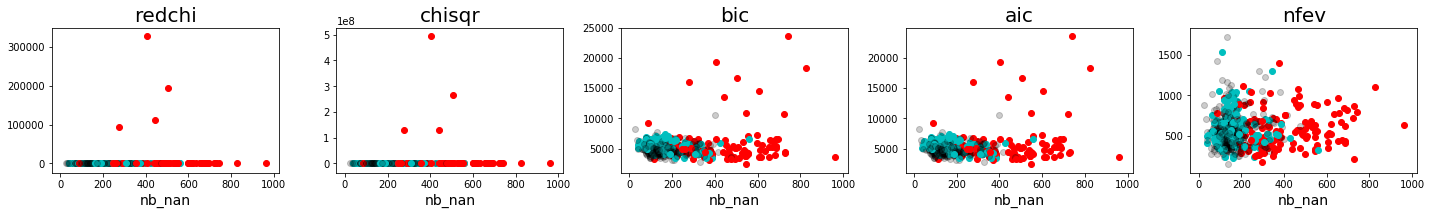

In [6]:
fig(plot='sujet')